In [47]:
import pandas as pd
import quandl
import math, datetime
import numpy as np
from sklearn import preprocessing, svm
from  sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [48]:
df = quandl.get('WIKI/GOOGL')

In [49]:
df

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-21,1092.57,1108.70,1087.21,1094.000,1990515.0,0.0,1.0,1092.570000,1108.700000,1087.210000,1094.000000,1990515.0
2018-03-22,1080.01,1083.92,1049.64,1053.150,3418154.0,0.0,1.0,1080.010000,1083.920000,1049.640000,1053.150000,3418154.0
2018-03-23,1051.37,1066.78,1024.87,1026.550,2413517.0,0.0,1.0,1051.370000,1066.780000,1024.870000,1026.550000,2413517.0


In [50]:
df = df[['Adj. Open', 'Adj. High','Adj. Low','Adj. Close','Adj. Volume']]

In [51]:
df

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,
2004-08-19,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,52.542193,54.167209,52.100830,53.164113,9188600.0
...,...,...,...,...,...
2018-03-21,1092.570000,1108.700000,1087.210000,1094.000000,1990515.0
2018-03-22,1080.010000,1083.920000,1049.640000,1053.150000,3418154.0
2018-03-23,1051.370000,1066.780000,1024.870000,1026.550000,2413517.0


In [52]:
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close'])/df['Adj. Close'] *100
df['PCT_Change'] = (df['Adj. Close'] - df['Adj. Open'])/df['Adj. Open'] *100

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [53]:
df = df[['Adj. Close', 'HL_PCT', 'PCT_Change', 'Adj. Volume']].copy()

In [54]:
df

,Adj. Close,HL_PCT,PCT_Change,Adj. Volume
Date,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0
2004-08-20,54.322689,0.710922,7.227007,22834300.0
2004-08-23,54.869377,3.729433,-1.227880,18256100.0
2004-08-24,52.597363,6.417469,-5.726357,15247300.0
2004-08-25,53.164113,1.886792,1.183658,9188600.0
...,...,...,...,...
2018-03-21,1094.000000,1.343693,0.130884,1990515.0
2018-03-22,1053.150000,2.921711,-2.487014,3418154.0
2018-03-23,1026.550000,3.918952,-2.360729,2413517.0


In [55]:
forecast_col  = 'Adj. Close'
df.fillna(-99999, inplace=True)
forecast_out = int(math.ceil(0.1 * len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)

df.head()

,Adj. Close,HL_PCT,PCT_Change,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0,214.005615
2004-08-20,54.322689,0.710922,7.227007,22834300.0,210.725489
2004-08-23,54.869377,3.729433,-1.227880,18256100.0,208.072299
2004-08-24,52.597363,6.417469,-5.726357,15247300.0,218.288837
2004-08-25,53.164113,1.886792,1.183658,9188600.0,223.309335


In [56]:
x = np.array(df.drop(['label'], 1))
x = preprocessing.scale(x)
x_lately = x[-forecast_out:]
x = x[:-forecast_out]
df.dropna(inplace=True)
y = np.array(df['label'])

len(df)

3081

In [57]:
X_lately = preprocessing.scale(x_lately)

In [58]:
print(len(x), len(y))


3081 3081


In [59]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [60]:
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
import pickle
with open('linearregression.pickle' , 'wb') as f:
    pickle.dump(clf, f)
pickle_in = open('linearregression.pickle', 'rb')
clf = pickle.load(pickle_in)
Accuracy = clf.score(X_test, y_test)
Accuracy

0.8711534799357217

In [61]:

forecast_set = clf.predict(x_lately)

print(forecast_set, Accuracy, forecast_out)

[ 962.84714563  949.20822199  979.30267106  974.29390407  985.55679017
  979.7965833   984.80840229  987.13035957  977.19572249  974.01304703
 1004.22327953  993.87264723  978.08589654  960.42019269  962.77910869
  977.96065463  976.43171851  994.83614255  997.07167768 1015.93906413
 1012.91145031 1029.56496247 1028.45994416 1024.25581435 1013.94814172
 1019.45014267 1018.12415316 1013.26056997 1010.56059242 1010.56926251
 1018.43112799 1007.64413063 1004.35962677  993.6859836  1016.17244011
 1011.967543   1017.46723203 1040.01819687 1034.87963005 1032.3926817
 1035.56780989 1034.66640851 1039.63338488 1031.83336937 1032.75624241
 1035.26387717 1031.72650446 1061.52982592 1061.84851483 1072.42101843
 1068.70269836 1070.02704373 1032.57566902 1025.00939871 1019.85402077
 1029.94043744 1027.04581186 1024.37201892 1038.6466038  1038.79870812
 1034.82309314 1043.85988471 1049.24726367 1048.60004818 1047.42831872
 1052.16720224 1058.18771754 1062.28540063 1065.7907114  1061.44612583
 1056.2

In [62]:
df['Forecast'] = np.nan

In [63]:
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86000
next_unix = last_unix + one_day
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns) -1)] + [i]

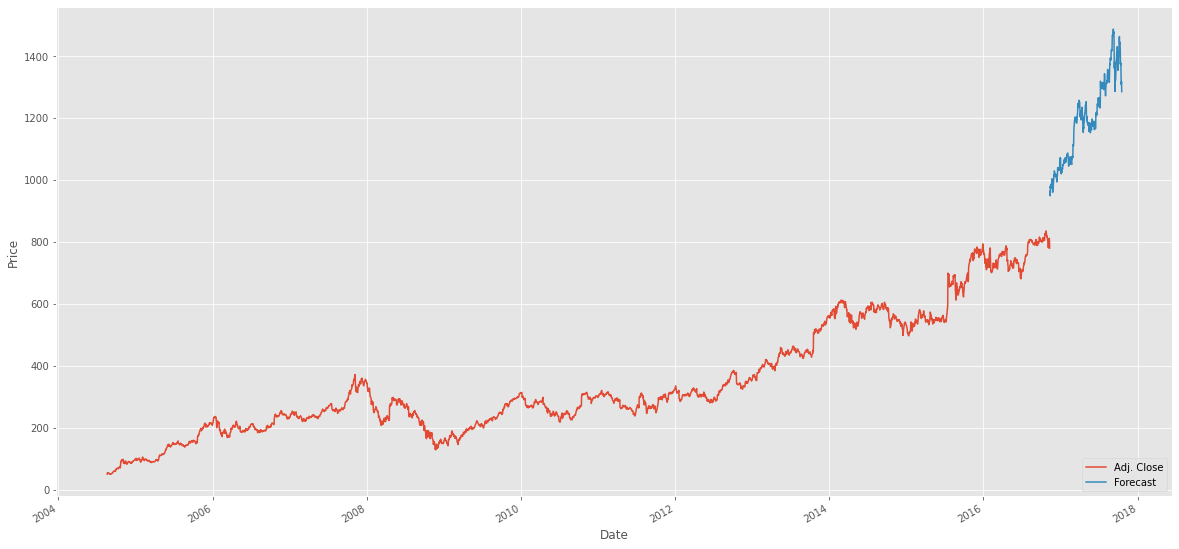

In [64]:
plt.figure(figsize = (20,10))
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.ylabel('Price')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cf5d7c74-8209-4abb-b75d-35494431ca44' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>